In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')

3. Given a matrix with $n$ rows and $m$ columns (e.g., the first 4 rows
from the `iris` dataset), compute the correlation matrix, i.e.,
an $m\times m$ matrix $\mathbf{C}$ with $c_{i,j}$ denoting
the Pearson coefficient for the $i$-th and the $j$-th column.

In [2]:
A = np.array(iris.iloc[:,:4])
A.shape

(150, 4)

In [3]:
A_center = A-np.mean(A, axis=0) # centering
# square root of sum of squares of vals in each column (separately)
A_normalized = A_center/np.sqrt(np.sum(A_center**2,axis=0))
A_normalized.T @ A_normalized 

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

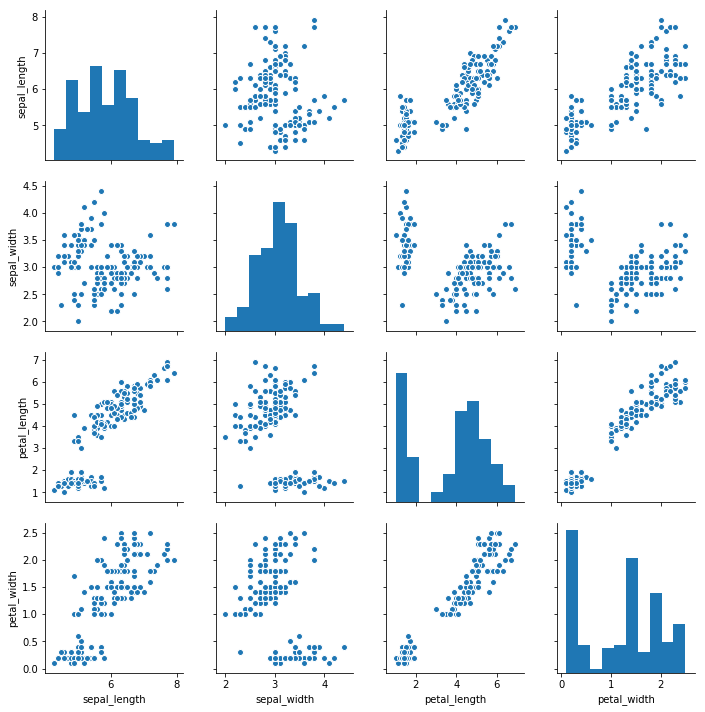

In [4]:
import seaborn as sns
sns.pairplot(iris.iloc[:,:4])

2. Let `x` and `y` be two vectors of the same length, $n$.
Compute [the Spearman rank correlation coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient),
given by:
$$
\varrho(\mathbf{x},\mathbf{y})
=
1-\frac{6 \sum_{i=1}^n d_i^2}{n (n^2-1)},
$$
where $d_i=R(\mathbf{x})_i-R(\mathbf{y})_i$, $i=1,\dots,n$,
and $R(\mathbf{x})_i$ denotes the rank of $x_i$ in `x`.

In [5]:
import scipy.stats

In [6]:
scipy.stats.rankdata([22.5, 20.0, 19.5, 25.25, 30.5])

array([3., 2., 1., 4., 5.])

In [7]:
scipy.stats.rankdata([22.5, 20.0, 19.5, 20.0, 25.25, 30.5])

array([4. , 2.5, 1. , 2.5, 5. , 6. ])

In [8]:
# also compute spearman's rho between all vars in A - store them as a matrix
def spearman(x, y):
    d = scipy.stats.rankdata(x)-scipy.stats.rankdata(y)
    n = len(x)
    return 1- (6*np.square(d).sum())/(n*(n*n-1))  # np.sum(d**2)

In [9]:
x = np.random.rand(100)
spearman(x, 2*x-1), spearman(x, -2*x-1), spearman(np.random.rand(100), np.random.rand(100))

(1.0, -1.0, 0.07569156915691566)

In [10]:
k = A.shape[1]
S = np.empty((k,k))
for i in range(k):
    for j in range(k):
        S[i,j] = spearman(A[:,i], A[:,j])
S

array([[ 1.        , -0.16076003,  0.88213076,  0.83524157],
       [-0.16076003,  1.        , -0.30268456, -0.27726832],
       [ 0.88213076, -0.30268456,  1.        ,  0.93803013],
       [ 0.83524157, -0.27726832,  0.93803013,  1.        ]])

In [11]:
spearman(x, 2*np.exp(10*x))

1.0

In [12]:
def pearson(x,y):
    return np.sum(
        (x-np.mean(x))/np.std(x, ddof=1) * (y-np.mean(y))/np.std(y, ddof=1)
    ) / (len(x)-1)

pearson(x, 2*np.exp(10*x))

0.6859938754818824

# relational & comparison ops

In [13]:
A = np.c_[1:4, 11:14] 
A

array([[ 1, 11],
       [ 2, 12],
       [ 3, 13]])

In [14]:
# < > <= >= == !=
# all vectorized like +, -, * etc.
# they result in bool array

In [15]:
A > 10

array([[False,  True],
       [False,  True],
       [False,  True]])

In [16]:
A == A

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [17]:
A == A*2

array([[False, False],
       [False, False],
       [False, False]])

In [18]:
A > np.r_[1,11]

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [19]:
# np.all
# np.any

In [20]:
np.all(A == A)

True

In [21]:
np.any(A>10)

True

In [22]:
# are all means approximately zero?
np.all(np.abs(A_normalized.mean(axis=0)) < 1e-9)

True

In [23]:
np.sum(A>10) # how many are true?
# True  -> 1
# False -> 0

3

In [24]:
np.mean(A>10) # proportion/fraction

0.5

In [25]:
1 < 2 < 3 # operator chaining

True

In [26]:
np.r_[1] < np.r_[2] < np.r_[3]

array([ True])

In [27]:
np.r_[1,2] < np.r_[2,3] < np.r_[3,4]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [28]:
np.r_[1,2] < np.r_[2,3] and np.r_[2,3] < np.r_[3,4]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [29]:
# and -> &
#  or -> |
# not -> ~

In [30]:
np.r_[1,2] < np.r_[2,3] & np.r_[2,3] < np.r_[3,4]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [31]:
# https://docs.python.org/3/reference/expressions.html
(np.r_[1,2] < np.r_[2,3]) & (np.r_[2,3] < np.r_[3,4])

array([ True,  True])

In [32]:
np.random.seed(123)
x = np.random.rand(10)
x
# what is the proportion of values in x that are in [0.25, 0.75]?


array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752])

In [33]:
np.mean( (x>=0.25) & (x<=.75) )

0.8

# Vectorized math ops

In [34]:
# np.sqrt, np.log, np.exp, np.cos, np.sin, np.abs, np.round, ...
# vectorized --> f(x) = f(x[i,j]) for all i,j,..
# result of the same shape as input

In [35]:
A

array([[ 1, 11],
       [ 2, 12],
       [ 3, 13]])

In [36]:
np.exp(A)

array([[2.71828183e+00, 5.98741417e+04],
       [7.38905610e+00, 1.62754791e+05],
       [2.00855369e+01, 4.42413392e+05]])

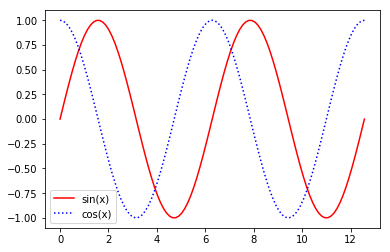

In [37]:
x = np.r_[0:(4*np.pi):101j] # np.linspace(0, (4*np.pi), 101)
plt.plot(x, np.sin(x), "r-", label="sin(x)")
plt.plot(x, np.cos(x), "b:", label="cos(x)")
plt.legend()
plt.show()

# Array indexing

# vector indexing

In [38]:
# pure  Python list indexing
x = [1,2,3,4]
x[0] # scalar->extract

1

In [39]:
x[::-1] # slice->subsetting

[4, 3, 2, 1]

In [40]:
x = np.r_[1, 3, 2, 5, 4]

In [41]:
x

array([1, 3, 2, 5, 4])

In [42]:
x[0]

1

In [43]:
type(x[0])

numpy.int64

In [44]:
x[:1]

array([1])

In [45]:
x[::-1]

array([4, 5, 2, 3, 1])

In [46]:
# 1. scalar-based idxing
# 2. slice-based
# 3. int-vect-based

In [47]:
x[ [1, 0, 1, 3] ]

array([3, 1, 3, 5])

In [48]:
x[ [0, -1] ]

array([1, 4])

In [49]:
x[ [0] ]

array([1])

In [50]:
# 4. bool vect-based

In [51]:
x>2

array([False,  True, False,  True,  True])

In [52]:
x

array([1, 3, 2, 5, 4])

In [53]:
x[x>2]

array([3, 5, 4])

In [54]:
x[ (x>2)&(x<5) ]

array([3, 4])

In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
iris.sepal_length[(iris.species=="setosa") & (iris.petal_width>0.4)]

23    5.1
43    5.0
Name: sepal_length, dtype: float64

In [57]:
np.random.seed(6)
x = np.round(np.random.normal(size=20), 2)
x

array([-0.31,  0.73,  0.22, -0.9 , -2.49,  0.91,  1.13, -1.51,  1.64,
       -0.43,  2.63,  0.6 , -0.34,  1.24,  0.11,  0.13,  0.08, -0.16,
        0.63,  0.81])

* Print all values in $[-2,-1]\cup[1,2]$.

In [58]:
x[ ((x>=-2.0)&(x<=-1.0))|((x>=1.0)&(x<=2.0)) ]

array([ 1.13, -1.51,  1.64,  1.24])

In [59]:
x[ (np.abs(x) <= 2.0) & (np.abs(x)>=1.0) ]

array([ 1.13, -1.51,  1.64,  1.24])

* Print the number and the proportion of nonnegative elements in `x`.

In [60]:
np.sum(x>=0)

13

In [65]:
(x>=0).mean()

0.65

* Compute the arithmetic mean of absolute values.

In [66]:
np.mean(np.abs(x))

0.85

* Determine elements in `x` which are the least and the most distant from 0.

In [67]:
x[np.argsort(np.abs(x-0.0))[[0,-1]]]

array([0.08, 2.63])

In [68]:
# argmin - location of min == argsort[0]
# argmax - location of max == argsort[-1]
x[np.argmin(np.abs(x))]

0.08

* Determine 3 elements in `x` which are the most distant from the arithmetic mean of `x`.

In [69]:
x[np.argsort(np.abs(x-np.mean(x)))[-3:]]

array([-1.51,  2.63, -2.49])

* Create a vector `x2`, which is a version of `x` with all outliers removed,
i.e., all observations $x_i$ such that $x_i\not\in[Q_1-1.5IQR, Q_3+1.5IQR]$,
where $IQR=Q_3-Q_1$ denotes the interquartile range and $Q_1$ and $Q_3$
denote the 1st and 3rd sample quartiles, respectively.

In [70]:
q1, q3 = np.percentile(x, [25, 75])
iqr = q3-q1
x[ (x>=q1-1.5*iqr) & (x<=q3+1.5*iqr)]

array([-0.31,  0.73,  0.22, -0.9 ,  0.91,  1.13, -1.51,  1.64, -0.43,
        0.6 , -0.34,  1.24,  0.11,  0.13,  0.08, -0.16,  0.63,  0.81])

In [71]:
q1, q3, iqr

(-0.3175, 0.8350000000000001, 1.1525)

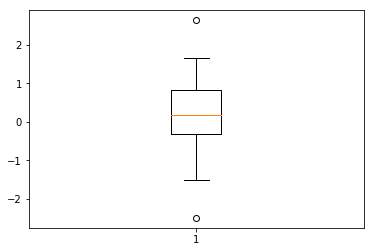

In [72]:
plt.boxplot(x)
plt.show()

* Create a vector `y` such that `y[i]` is equal to `"nonnegative"`
if the corresponding `x[i]>=0` and `"negative"` otherwise.

In [73]:
np.where(x>=0, "nonnegative", "negative")

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [74]:
y = np.repeat("nonnegative", len(x))
y[x<0] = "negative"
y

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [75]:
np.array(["negative", "nonnegative"])[ (x>=0).astype(np.int) ]

array(['negative', 'nonnegative', 'nonnegative', 'negative', 'negative',
       'nonnegative', 'nonnegative', 'negative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative', 'negative',
       'nonnegative', 'nonnegative', 'nonnegative', 'nonnegative',
       'negative', 'nonnegative', 'nonnegative'], dtype='<U11')

In [76]:
(x>=0).astype(np.int)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

* Create a vector `y` such that `y[i]` is equal to `"small"` if
the corresponding `x[i]<-1`, `"large"` if `x[i]>1` and `"medium"` otherwise.

In [77]:
np.where(x>1, "large", np.where(x<-1, "small", "medium"))

array(['medium', 'medium', 'medium', 'medium', 'small', 'medium', 'large',
       'small', 'large', 'medium', 'large', 'medium', 'medium', 'large',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium'],
      dtype='<U6')

In [78]:
# categorical data: 
x = np.r_[0,1,2,1,1,1,2,1,0,1]
l = np.array(["small", "medium", "large"])
l[x]

array(['small', 'medium', 'large', 'medium', 'medium', 'medium', 'large',
       'medium', 'small', 'medium'], dtype='<U6')

## Indexing



We have 4 vector indexing schemes:

    scalar-based
    slice
    int-vector
    bool-vector

ONLY slice-based indexing returns a view on an existing array


In [79]:
x

array([0, 1, 2, 1, 1, 1, 2, 1, 0, 1])

In [80]:
x.ctypes.data, x.strides

(140565171731200, (8,))

In [81]:
x2 = x[ [0, 1, 2] ]
x2.ctypes.data, x2.strides

(140565127507760, (8,))

In [82]:
x2 = x[ [0, 1, 2, 0, -1, 4, 2, 0] ]
x2.ctypes.data, x2.strides

(140565125084688, (8,))

In [83]:
x2 = x[ ::2 ]
x2.ctypes.data, x2.strides

(140565171731200, (16,))

In [90]:
x2

array([1, 0, 1, 4, 1, 2, 1, 4, 1, 0])

In [84]:
x2 = x[ 2::2 ]
x2.ctypes.data, x2.strides

(140565171731216, (16,))

In [85]:
x2 = x[ ::-1 ]
x2.ctypes.data, x2.strides

(140565171731272, (-8,))

In [86]:
def mod(x):
    x *= 2
    return x

In [87]:
x

array([0, 1, 2, 1, 1, 1, 2, 1, 0, 1])

In [88]:
print(mod(x[::2]))
print(x)

[0 4 2 4 0]
[0 1 4 1 2 1 4 1 0 1]


In [89]:
print(mod(x[::2].copy()))
print(x)

[0 8 4 8 0]
[0 1 4 1 2 1 4 1 0 1]


# matrix indexing

In [91]:
A = np.r_[1:13].reshape(3,4)
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [92]:
# A[i,j] == A[(i,j)]

i$\setminus$j     | scalar | slice | intvect | boolvec |
------------------|--------|-------|---------|---------|
scalar            |  scalar  |  vector (V)     |   vector      | vector        |
slice             |   x    |  matrix(V)     |  matrix       |  matrix       |
intvec            |   x    |   x   |  vectorized       |    vectorized     |
boolvec           |   x    |   x   |    x    |    vectorized     |

V == View on an existing array

In [93]:
A[0,1]

2

In [94]:
A[-1,0]

9

In [95]:
A[-1,::-1]

array([12, 11, 10,  9])

In [96]:
A[:,-1] # all rows, last col

array([ 4,  8, 12])

In [97]:
A[-1, [0,1,0] ]

array([ 9, 10,  9])

In [98]:
A[ np.r_[True,False,True], -1]

array([ 4, 12])

In [99]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [100]:
A[:, A.mean(axis=0)>5]

array([[ 2,  3,  4],
       [ 6,  7,  8],
       [10, 11, 12]])

In [101]:
A[::2, ::-1]

array([[ 4,  3,  2,  1],
       [12, 11, 10,  9]])

In [102]:
A[:,:2]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10]])

In [158]:
A[::2, [0,1,0]]   # FROM:TO:STEP

array([[ 1,  2,  1],
       [ 9, 10,  9]])

In [159]:
A[:2, A.mean(axis=0)>5] #:2:1

array([[2, 3, 4],
       [6, 7, 8]])

In [160]:
A

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [161]:
A[np.r_[0,1,2], np.r_[0,1,2]]

array([ 1,  6, 11])

In [162]:
A[np.r_[0,1,-1], np.r_[-1,0,2]]

array([ 4,  5, 11])

In [163]:
A[np.r_[0,1,2].reshape(-1,1), np.r_[0,2].reshape(1,-1)]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [164]:
A[np.ix_(np.r_[0,1,2], np.r_[0,2])]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])